In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

# Read_data

In [4]:
import glob
directory=glob.glob(r"C://Users//SANATH//Downloads//text_data//text/*.txt")

data=[]
for file_path in directory:
    with open(file_path,'r') as file:
        lines=file.readlines()
        line1=lines[0].strip()
        line2=lines[1].strip()
        data.append([line1,line2])
df=pd.DataFrame(data,columns=['Label','Text'])

In [5]:
df.head()

,Label,Text
0,MajorClaim,we should attach more importance to cooperatio...
1,Premise,Take Olympic games which is a form of competit...
2,Premise,The high technology and new ideas applied into...
3,Premise,pollutions are not just caused by the burning ...
4,Premise,the improvements of work efficiency also attri...


In [6]:
df.shape

(6089, 2)

# EDA

In [7]:
df['Label'].value_counts(normalize=True)

Premise       0.629332
Claim         0.247331
MajorClaim    0.123337
Name: Label, dtype: float64

In [8]:
df['Label'].unique()

array(['MajorClaim', 'Premise', 'Claim'], dtype=object)

In [9]:
df['Label'].value_counts()

Premise       3832
Claim         1506
MajorClaim     751
Name: Label, dtype: int64

<AxesSubplot:xlabel='Label', ylabel='count'>

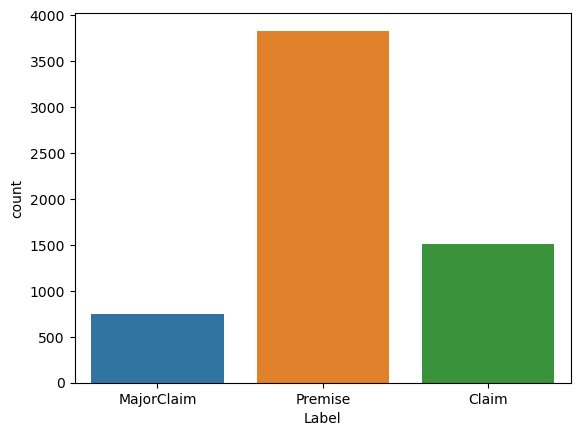

In [10]:
sns.countplot(x='Label', data=df)

In [11]:
# step-1
y = df['Label']
X = df[['Text']]

In [12]:
# step-2
# Splitting into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [13]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [14]:
# object
stemmer=PorterStemmer()

In [15]:
# object
lemmatizer=WordNetLemmatizer()

In [16]:
# step-3.1
def preprocess(raw_text,flag):
    # removing special characters
    sentence=re.sub("[^a-zA-Z]"," ",raw_text)
    # changing sentence to lower case
    sentence=sentence.lower()
    # applying token into words
    token=sentence.split()
    # applying stopword
    clean_token=[t for t in token if t not in stopwords.words('english')]
    # applying flag [stemmer,lemmatizer]
    if flag==stemmer:
        clean_token = [stemmer.stem(word) for word in clean_token]
    else:
        clean_token=[lemmatizer.lemmatize(word) for word in clean_token]
    return pd.Series([" ".join(clean_token), len(clean_token)])

In [17]:
# !pip install tqdm
from tqdm import tqdm, tqdm_notebook

In [18]:
# Register `pandas.progress_apply` and `pandas.Series.map_apply` with `tqdm`

tqdm.pandas()

In [19]:
# step-3.2  [ applying stemmer]
temp_df = X_train['Text'].progress_apply(lambda x: preprocess(x, 'stemmer'))

temp_df.head()

100%|██████████████████████████████████████████████████████████████████████████████| 4871/4871 [00:53<00:00, 91.02it/s]


,0,1
4893,product usually look gorgeous good quality adv...,15
3351,great success requires taking great risk,6
549,product prove ensure human health completely,6
1718,unfair ridiculous coverage may vexation famous...,8
3456,young people overcome bad habit fulfill goal q...,9


In [20]:
# step-3.3  [setting columns names]
temp_df.columns = ['clean_text_stem', 'text_length_stem']

temp_df.head()

,clean_text_stem,text_length_stem
4893,product usually look gorgeous good quality adv...,15
3351,great success requires taking great risk,6
549,product prove ensure human health completely,6
1718,unfair ridiculous coverage may vexation famous...,8
3456,young people overcome bad habit fulfill goal q...,9


In [21]:
# step-3.4
X_train=pd.concat([X_train,temp_df],axis=1)
X_train.head()

,Text,clean_text_stem,text_length_stem
4893,products usually look more gorgeous and with g...,product usually look gorgeous good quality adv...,15
3351,great success requires taking great risks,great success requires taking great risk,6
549,these products prove to ensure human health co...,product prove ensure human health completely,6
1718,it is unfair that the ridiculous coverage may ...,unfair ridiculous coverage may vexation famous...,8
3456,young people can overcome their bad habits and...,young people overcome bad habit fulfill goal q...,9


In [22]:
# 3.1.1
# applying lemmatizer
temp_df = X_train['Text'].progress_apply(lambda x: preprocess(x, 'lemmotizer'))
temp_df.head()

100%|█████████████████████████████████████████████████████████████████████████████| 4871/4871 [00:48<00:00, 100.33it/s]


,0,1
4893,product usually look gorgeous good quality adv...,15
3351,great success requires taking great risk,6
549,product prove ensure human health completely,6
1718,unfair ridiculous coverage may vexation famous...,8
3456,young people overcome bad habit fulfill goal q...,9


In [23]:
# 3.1.2
# setting column names
temp_df.columns=['clean_text_lemm','len_text_lem']
temp_df.head()

,clean_text_lemm,len_text_lem
4893,product usually look gorgeous good quality adv...,15
3351,great success requires taking great risk,6
549,product prove ensure human health completely,6
1718,unfair ridiculous coverage may vexation famous...,8
3456,young people overcome bad habit fulfill goal q...,9


In [24]:
# 3.1.3
# adding X_train and temp_df
X_train=pd.concat([X_train,temp_df],axis=1)
X_train.head()

,Text,clean_text_stem,text_length_stem,clean_text_lemm,len_text_lem
4893,products usually look more gorgeous and with g...,product usually look gorgeous good quality adv...,15,product usually look gorgeous good quality adv...,15
3351,great success requires taking great risks,great success requires taking great risk,6,great success requires taking great risk,6
549,these products prove to ensure human health co...,product prove ensure human health completely,6,product prove ensure human health completely,6
1718,it is unfair that the ridiculous coverage may ...,unfair ridiculous coverage may vexation famous...,8,unfair ridiculous coverage may vexation famous...,8
3456,young people can overcome their bad habits and...,young people overcome bad habit fulfill goal q...,9,young people overcome bad habit fulfill goal q...,9


# BOW

In [25]:
# step-3.5   [finding X_train_transform   'BOW']
from sklearn.feature_extraction.text import CountVectorizer
vector=CountVectorizer()
X_train_transform=vector.fit_transform(X_train['clean_text_lemm'])

# Creating word cloud

In [23]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
     ------------------------------------- 153.3/153.3 kB 94.4 kB/s eta 0:00:00


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [24]:
from wordcloud import WordCloud

In [30]:
y_train

4893    Premise
3351    Premise
549     Premise
1718    Premise
3456    Premise
         ...   
4931      Claim
3264    Premise
1653      Claim
2607    Premise
2732      Claim
Name: Label, Length: 4871, dtype: object

In [31]:
premise_df=X_train.loc[y_train=='Premise',:]
premise_df.head()

,Text,clean_text_stem,text_length_stem,clean_text_lemm,len_text_lem
4893,products usually look more gorgeous and with g...,product usually look gorgeous good quality adv...,15,product usually look gorgeous good quality adv...,15
3351,great success requires taking great risks,great success requires taking great risk,6,great success requires taking great risk,6
549,these products prove to ensure human health co...,product prove ensure human health completely,6,product prove ensure human health completely,6
1718,it is unfair that the ridiculous coverage may ...,unfair ridiculous coverage may vexation famous...,8,unfair ridiculous coverage may vexation famous...,8
3456,young people can overcome their bad habits and...,young people overcome bad habit fulfill goal q...,9,young people overcome bad habit fulfill goal q...,9


In [33]:
words = ' '.join(premise_df['clean_text_lemm'])

print(words[:100])

product usually look gorgeous good quality advertisement people likely buy good impulsively without 


In [34]:
clean_word=' '.join([word for word in words.split() if 'subject' not in word])

In [36]:
premise_wordcloud=WordCloud(stopwords=stopwords.words('english'),
                           background_color='black',
                           width=1600,
                           height=800).generate(clean_word)

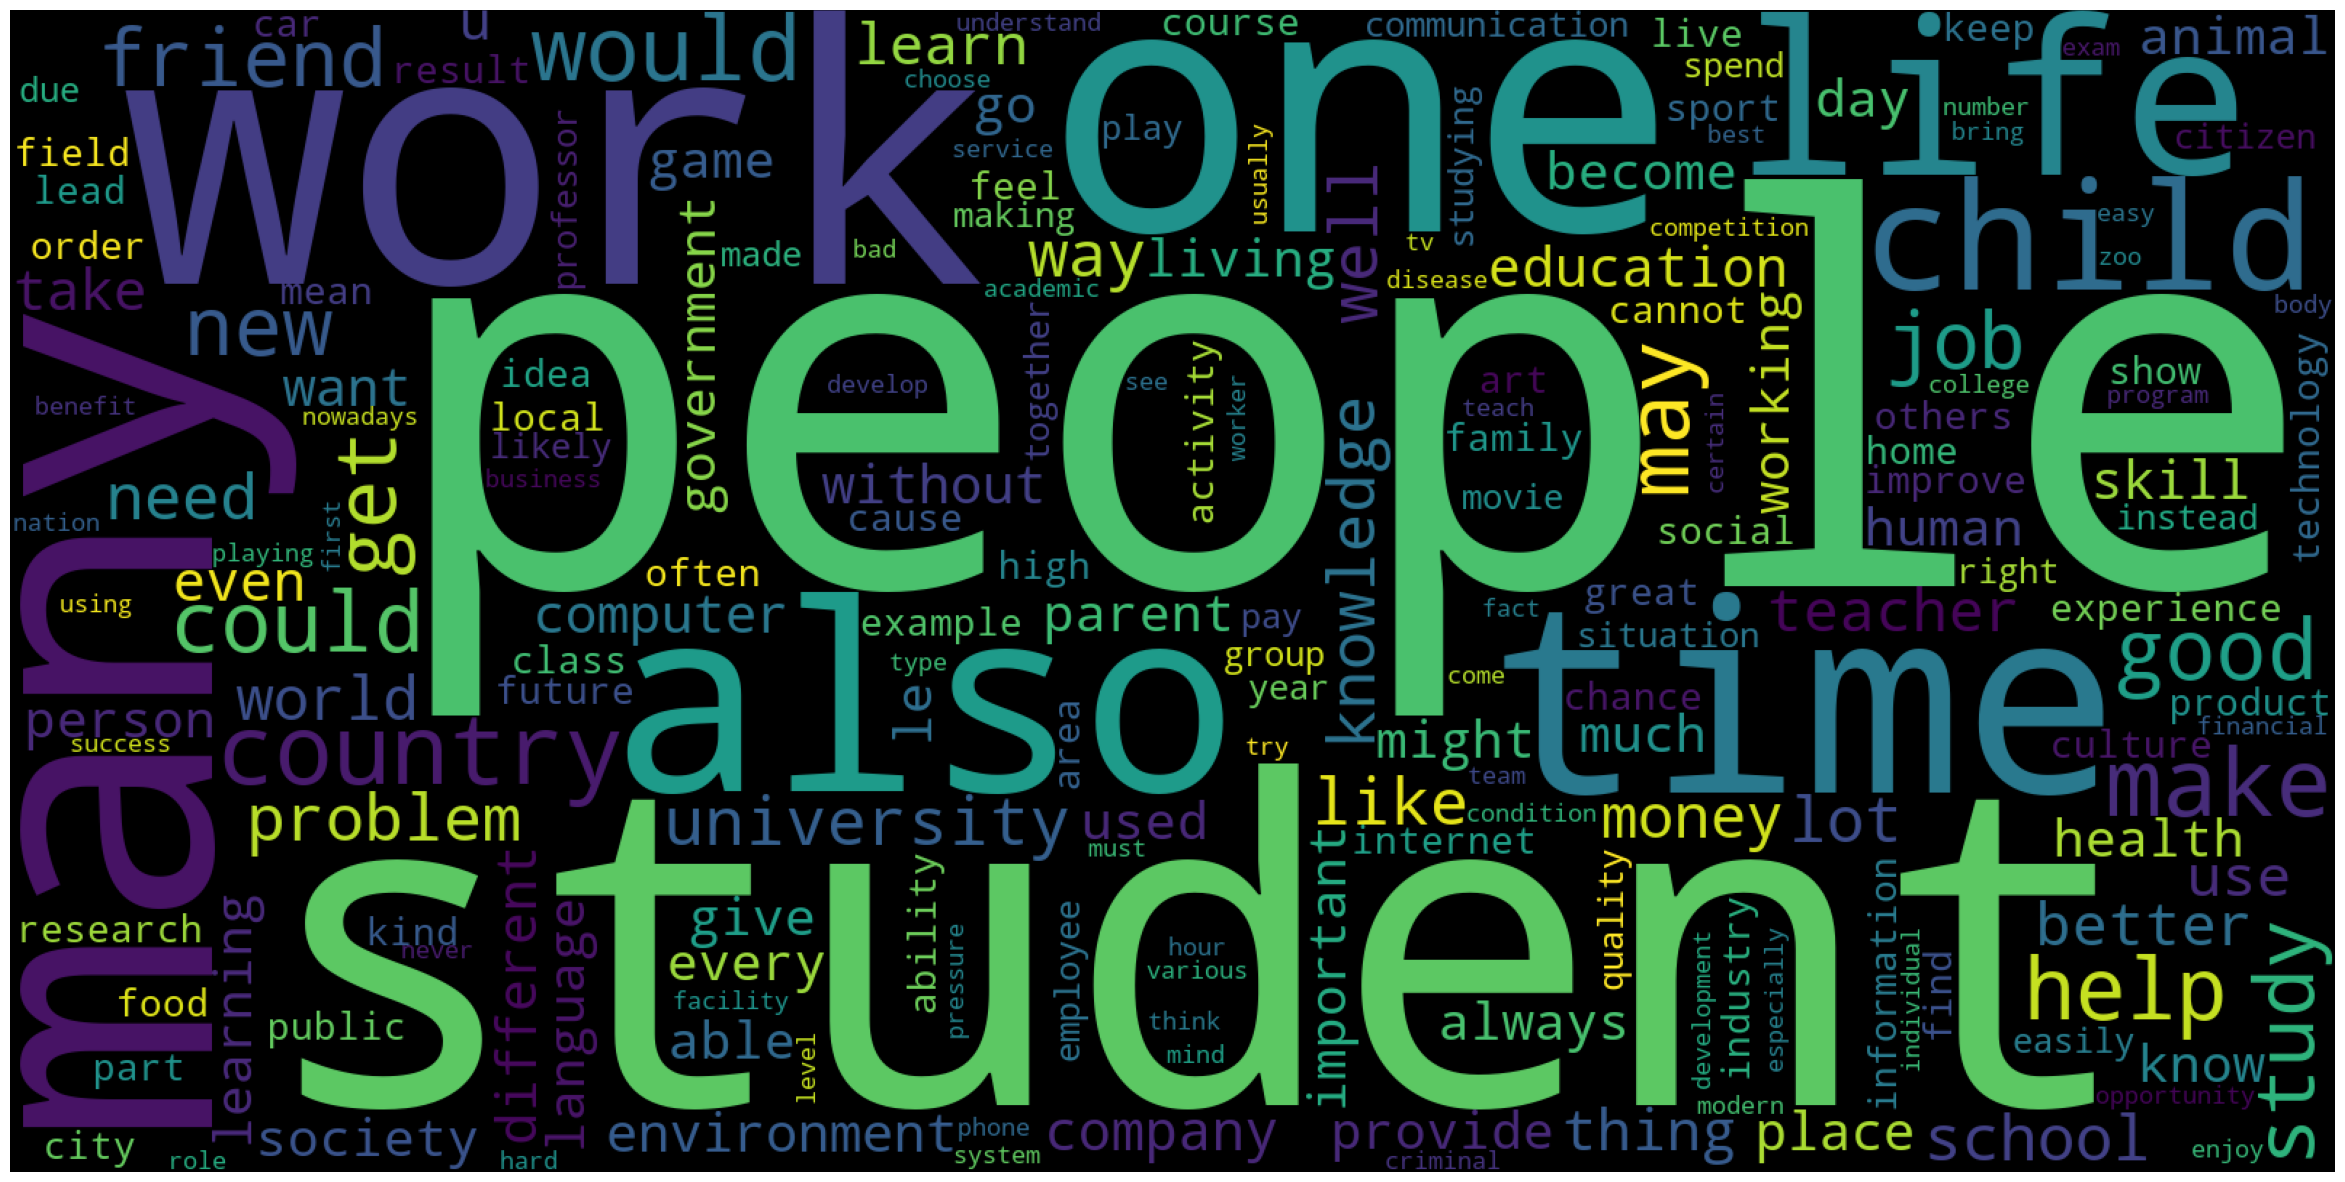

In [38]:
plt.figure(1,figsize=(30,20))
plt.imshow(premise_wordcloud)
plt.axis('off')
plt.show()

In [26]:
# step-4   [Bulding model]
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X_train_transform,y_train)

C:\Users\SANATH\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
# step-5.1   [preprocessing]
temp_df=X_test['Text'].progress_apply(lambda x:preprocess(x,'stemmer'))
temp_df.head()

100%|██████████████████████████████████████████████████████████████████████████████| 1218/1218 [00:12<00:00, 98.71it/s]


,0,1
263,work punch punch whenever want,5
1427,sometimes see poor person much money hiring go...,21
4475,earn money based creativity personal idea,6
938,investing art could bring employment opportuni...,11
124,prevent conflict also friend even family member,7


In [28]:
# step-5.2
temp_df.columns=['clean_text_stemm','clean_len_stemm']
temp_df.head()

,clean_text_stemm,clean_len_stemm
263,work punch punch whenever want,5
1427,sometimes see poor person much money hiring go...,21
4475,earn money based creativity personal idea,6
938,investing art could bring employment opportuni...,11
124,prevent conflict also friend even family member,7


In [29]:
# step-5.3
X_test=pd.concat([X_test,temp_df],axis=1)
X_test.head()

,Text,clean_text_stemm,clean_len_stemm
263,When you work for yourself you can punch in an...,work punch punch whenever want,5
1427,sometimes we see that a poor person who do not...,sometimes see poor person much money hiring go...,21
4475,I can earn more money based on my creativity a...,earn money based creativity personal idea,6
938,investing in art could bring employment opport...,investing art could bring employment opportuni...,11
124,It will not only prevent conflicts but also to...,prevent conflict also friend even family member,7


In [30]:
# step-5.4   [applying lemmer]
temp_df=X_test['Text'].progress_apply(lambda x:preprocess(x,'lemmer'))
temp_df.head()

100%|██████████████████████████████████████████████████████████████████████████████| 1218/1218 [00:12<00:00, 99.98it/s]


,0,1
263,work punch punch whenever want,5
1427,sometimes see poor person much money hiring go...,21
4475,earn money based creativity personal idea,6
938,investing art could bring employment opportuni...,11
124,prevent conflict also friend even family member,7


In [31]:
# step-5.5
temp_df.columns=['clean_text_lemmer','clean_len_lemmer']
temp_df.head()

,clean_text_lemmer,clean_len_lemmer
263,work punch punch whenever want,5
1427,sometimes see poor person much money hiring go...,21
4475,earn money based creativity personal idea,6
938,investing art could bring employment opportuni...,11
124,prevent conflict also friend even family member,7


In [32]:
# step-5.6
X_test=pd.concat([X_test,temp_df],axis=1)
X_test.head()

,Text,clean_text_stemm,clean_len_stemm,clean_text_lemmer,clean_len_lemmer
263,When you work for yourself you can punch in an...,work punch punch whenever want,5,work punch punch whenever want,5
1427,sometimes we see that a poor person who do not...,sometimes see poor person much money hiring go...,21,sometimes see poor person much money hiring go...,21
4475,I can earn more money based on my creativity a...,earn money based creativity personal idea,6,earn money based creativity personal idea,6
938,investing in art could bring employment opport...,investing art could bring employment opportuni...,11,investing art could bring employment opportuni...,11
124,It will not only prevent conflicts but also to...,prevent conflict also friend even family member,7,prevent conflict also friend even family member,7


In [33]:
# step-5.7  [finding X_test_transform]
X_test_transform=vector.transform(X_test['clean_text_lemmer'])


In [34]:
# step-6
y_test_predict=reg.predict(X_test_transform)

In [35]:
# step-7
from sklearn.metrics import accuracy_score,classification_report
print("accuracy:",accuracy_score(y_test,y_test_predict))
print("class :",classification_report(y_test,y_test_predict))
#metrics.accuracy_scorecc(y_test,y_test_predict)

accuracy: 0.5960591133004927
class :               precision    recall  f1-score   support

       Claim       0.30      0.25      0.27       288
  MajorClaim       0.34      0.20      0.25       154
     Premise       0.70      0.80      0.75       776

    accuracy                           0.60      1218
   macro avg       0.45      0.42      0.42      1218
weighted avg       0.56      0.60      0.57      1218



# DT

In [36]:
from sklearn.tree import DecisionTreeClassifier
classi=DecisionTreeClassifier()
classi.fit(X_train_transform,y_train)


DecisionTreeClassifier()

In [37]:
y_test_predict=classi.predict(X_test_transform)

In [38]:
from sklearn.metrics import accuracy_score,classification_report
print("accc :",accuracy_score(y_test,y_test_predict))
print("classi :",classification_report(y_test,y_test_predict))

accc : 0.5886699507389163
classi :               precision    recall  f1-score   support

       Claim       0.30      0.25      0.27       288
  MajorClaim       0.38      0.29      0.33       154
     Premise       0.70      0.77      0.74       776

    accuracy                           0.59      1218
   macro avg       0.46      0.44      0.44      1218
weighted avg       0.56      0.59      0.57      1218



# KNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier
classi=KNeighborsClassifier()
classi.fit(X_train_transform,y_train)

y_test_predict=classi.predict(X_test_transform)

from sklearn.metrics import accuracy_score,classification_report
print("accu :",accuracy_score(y_test,y_test_predict))
print("class :",classification_report(y_test,y_test_predict))

accu : 0.5656814449917899
class :               precision    recall  f1-score   support

       Claim       0.23      0.14      0.17       288
  MajorClaim       0.22      0.15      0.18       154
     Premise       0.67      0.81      0.73       776

    accuracy                           0.57      1218
   macro avg       0.37      0.36      0.36      1218
weighted avg       0.51      0.57      0.53      1218



# Random forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
classi=RandomForestClassifier()
classi.fit(X_train_transform,y_train)

y_test_predict=classi.predict(X_test_transform)

from sklearn.metrics import accuracy_score,classification_report
print("accu :",accuracy_score(y_test,y_test_predict))
print("class :",classification_report(y_test,y_test_predict))

accu : 0.6486042692939245
class :               precision    recall  f1-score   support

       Claim       0.39      0.20      0.27       288
  MajorClaim       0.57      0.19      0.28       154
     Premise       0.69      0.91      0.78       776

    accuracy                           0.65      1218
   macro avg       0.55      0.43      0.44      1218
weighted avg       0.60      0.65      0.60      1218



# Applying TFIDF
* Term frequency inverse document frequency

In [51]:
# step-3
from sklearn.feature_extraction.text import TfidfVectorizer
vector=TfidfVectorizer()
X_train_transform=vector.fit_transform(X_train['clean_text_lemm'])

# Log-regg

In [47]:
# step-4
from sklearn.linear_model import LogisticRegression
reg=LogisticRegression()
reg.fit(X_train_transform,y_train)

# step-6
y_test_predict=reg.predict(X_test_transform)

# step-7
from sklearn.metrics import accuracy_score,classification_report
print("accu :",accuracy_score(y_test,y_test_predict))
print("class :",classification_report(y_test,y_test_predict))

accu : 0.4975369458128079
class :               precision    recall  f1-score   support

       Claim       0.29      0.44      0.35       288
  MajorClaim       0.25      0.34      0.29       154
     Premise       0.75      0.55      0.63       776

    accuracy                           0.50      1218
   macro avg       0.43      0.44      0.42      1218
weighted avg       0.58      0.50      0.52      1218



# RF

In [46]:
from sklearn.ensemble import RandomForestClassifier
classi=RandomForestClassifier()
classi.fit(X_train_transform,y_train)

y_test_predict=classi.predict(X_test_transform)

from sklearn.metrics import accuracy_score,classification_report
print("accu :",accuracy_score(y_test,y_test_predict))
print("class :",classification_report(y_test,y_test_predict))

accu : 0.46798029556650245
class :               precision    recall  f1-score   support

       Claim       0.25      0.44      0.32       288
  MajorClaim       0.25      0.20      0.22       154
     Premise       0.69      0.53      0.60       776

    accuracy                           0.47      1218
   macro avg       0.40      0.39      0.38      1218
weighted avg       0.53      0.47      0.49      1218



# KNN

In [49]:
from sklearn.neighbors import KNeighborsClassifier
classi=KNeighborsClassifier()
classi.fit(X_train_transform,y_train)

y_test_predict=classi.predict(X_test_transform)

from sklearn.metrics import accuracy_score,classification_report
print("accu :",accuracy_score(y_test,y_test_predict))
print("class :",classification_report(y_test,y_test_predict))

accu : 0.5041050903119869
class :               precision    recall  f1-score   support

       Claim       0.26      0.36      0.30       288
  MajorClaim       0.19      0.20      0.20       154
     Premise       0.72      0.62      0.67       776

    accuracy                           0.50      1218
   macro avg       0.39      0.39      0.39      1218
weighted avg       0.55      0.50      0.52      1218



# DT

In [50]:
from sklearn.tree import DecisionTreeClassifier
classi=DecisionTreeClassifier()
classi.fit(X_train_transform,y_train)
y_test_predict=classi.predict(X_test_transform)

from sklearn.metrics import accuracy_score,classification_report
print("accu :",accuracy_score(y_test,y_test_predict))
print("class :",classification_report(y_test,y_test_predict))

accu : 0.4540229885057471
class :               precision    recall  f1-score   support

       Claim       0.25      0.37      0.30       288
  MajorClaim       0.15      0.17      0.16       154
     Premise       0.69      0.54      0.61       776

    accuracy                           0.45      1218
   macro avg       0.36      0.36      0.35      1218
weighted avg       0.52      0.45      0.48      1218

